In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/games.csv')
data.head(25)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [53]:
data.isna().sum()#Проверим пропуски  столбцах

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Значительное количество пропусков наблюдается в слобцах : Critic_Score, User_Score,Rating- скорее всего это связано с тем, что оценки пользователей и критиков просто еще нет, и соотвественно рейтинг страдает так же.

In [54]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')# 

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


In [55]:
data.value_counts()

Name                          Platform  Year_of_Release  Genre         NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  User_Score  Rating
 Tales of Xillia 2            PS3       2012.0           Role-Playing  0.20      0.12      0.45      0.07         71.0          7.9         T         1
Red Dead Revolver             PS2       2004.0           Shooter       0.71      0.55      0.00      0.19         73.0          7.8         M         1
Red Dead Redemption           PS3       2010.0           Action        2.79      2.53      0.17      0.99         95.0          8.8         M         1
Red Bull BC One               DS        2008.0           Misc          0.08      0.00      0.00      0.01         48.0          5.3         E         1
Record of Agarest War 2       PS3       2010.0           Role-Playing  0.09      0.00      0.04      0.01         56.0          7.2         T         1
                                                                                             

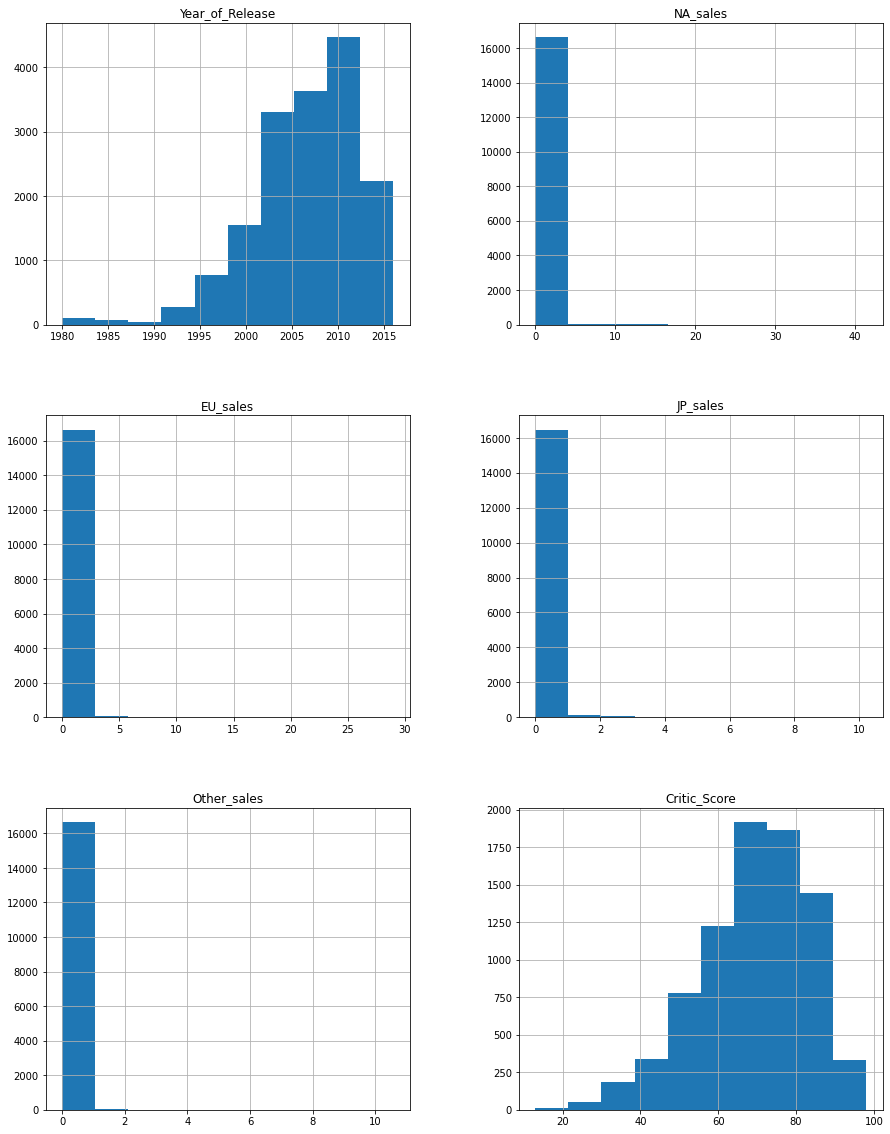

In [56]:
data.hist(figsize=(15, 20))
plt.show();

преобразуем назваия столбцов- приведем их к нижему регистру 

In [107]:
data.columns.tolist()
data.columns = data.columns.str.lower()
data.head(25)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


In [58]:
data['name'].value_counts()# найдем дубликаты

Need for Speed: Most Wanted        12
LEGO Marvel Super Heroes            9
FIFA 14                             9
Madden NFL 07                       9
Ratatouille                         9
                                   ..
Close Combat: First to Fight        1
Kurogane Kaikitan                   1
Gummy Bears Magical Medallion       1
Freedom Wars                        1
Coded Soul: Uke Keigareshi Idea     1
Name: name, Length: 11559, dtype: int64

В столбце Name встречаются дубликаты,заменим повторы на первое в списке повторение

In [59]:
data = data.drop_duplicates(subset=['name'], keep='first')

In [60]:
data['name'].value_counts()

Ray Gigant                                           1
Pirates vs Ninja Dodgeball                           1
Higurashi no Nakukoru ni Kizuna: Dai-Ni-Kan - Sou    1
Shinken de Watashi ni Koi Shinasai! R                1
Rock Band 4                                          1
                                                    ..
Vanquish                                             1
All-Star Baseball 2003                               1
Nike+ Kinect Training                                1
Pac-Man Party                                        1
Coded Soul: Uke Keigareshi Idea                      1
Name: name, Length: 11559, dtype: int64

In [61]:
print(data.duplicated().sum())

0


явные дубликаты убраны 

сбросим индексы в датафрейме 

In [62]:
data = data.reset_index(drop=True)
print(data['name'])


0                                Wii Sports
1                         Super Mario Bros.
2                            Mario Kart Wii
3                         Wii Sports Resort
4                  Pokemon Red/Pokemon Blue
                        ...                
11555                               15 Days
11556                      Aiyoku no Eustia
11557    Woody Woodpecker in Crazy Castle 5
11558                      LMA Manager 2007
11559               Haitaka no Psychedelica
Name: name, Length: 11560, dtype: object


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11560 entries, 0 to 11559
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11559 non-null  object 
 1   platform         11560 non-null  object 
 2   year_of_release  11396 non-null  float64
 3   genre            11559 non-null  object 
 4   na_sales         11560 non-null  float64
 5   eu_sales         11560 non-null  float64
 6   jp_sales         11560 non-null  float64
 7   other_sales      11560 non-null  float64
 8   critic_score     4880 non-null   float64
 9   user_score       5995 non-null   object 
 10  rating           5941 non-null   object 
dtypes: float64(6), object(5)
memory usage: 993.6+ KB


приведем столбцы в нужные форматы, столбец  year_of_release приведем к формату Int

In [64]:
data['genre'] = data['genre'].str.lower()

In [65]:
display(data['year_of_release'].unique())
display(data['genre'].unique())
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64., 71.,
       60., 63., 75., 69., 50., 25., 44., 57., 29., 47., 65., 55., 54.,
       20., 53., 37., 38., 33., 52., 30., 32., 45., 43., 51., 40., 42.,
       48., 39., 34., 46., 41., 36., 31., 27., 35., 26., 28., 23., 24.,
       21., 19., 22.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.7', '7.1', '3.4', '5.3', '8.9', '7.8', '7.5',
       '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6', '5.7', '5', '9.1',
       '6.5', 'tbd', '8.8', '6.9', '8.1', '9.4', '6.8', '6.1', '4', '6.4',
       '9.3', '6', '4.9', '6.7', '6.2', '4.6', '5.9', '5.4', '3.9', '5.8',
       '5.6', '2.9', '5.2', '4.1', '4.5', '4.8', '5.1', '3.5', '1.9',
       '3.1', '4.2', '5.5', '2.2', '2', '9.5', '4.4', '2.1', '3.3', '2.8',
       '3.8', '3', '0', '3.6', '9.6', '3.7', '4.7', '2.7', '1.1', '0.3',
       '1.7', '2.4', '1.5', '2.5', '0.5', '1.8', '0.9', '1', '3.2', '1.3',
       '0.7', '0.2', '1.2', '0.6', '2.3'], dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'EC', 'RP'], dtype=object)

В столбце user_score встречается тип tbd это текстовый файл,данный тип данных может помешать нам в дальнейшем в расчетах, так как не является числовым , по этой причине необходимо перевести его в nan для удобства.

In [66]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'].value_counts()

8.2    193
8      182
7.8    180
8.3    176
8.5    168
      ... 
1.2      1
0.2      1
0.7      1
1.3      1
0        1
Name: user_score, Length: 92, dtype: int64

В столбцах 'name', 'year_of_release', 'genre- есть пропуски :
удалим пропуски в столбце  name, так как такие пропуски могуть повлиять на данные некорректно;
в столбце year_of_release- пропуски недопустимы, так как они повлияют на актуальность графиков, пропуски возникли возможно привыгрузке, удалим данные пропуски;
столбец genre с пропусками помешает достоверно выявить данные по популярности жанров, удалим такие строки; 
rating-важный показатель возрасного ограничения, пропуски данной информации влияют на достоверность информации

In [67]:
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
def replace_wrong_user_scores(wrong_user_scores, correct_user_score):
    data['rating'] = data['rating'].replace(wrong_user_scores, correct_user_score)
    replace_wrong_user_scores(np.NaN, 'неопределенный')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11395 entries, 0 to 11559
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11395 non-null  object 
 1   platform         11395 non-null  object 
 2   year_of_release  11395 non-null  float64
 3   genre            11395 non-null  object 
 4   na_sales         11395 non-null  float64
 5   eu_sales         11395 non-null  float64
 6   jp_sales         11395 non-null  float64
 7   other_sales      11395 non-null  float64
 8   critic_score     4803 non-null   float64
 9   user_score       4397 non-null   object 
 10  rating           5845 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.0+ MB


In [69]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11395 entries, 0 to 11559
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11395 non-null  object 
 1   platform         11395 non-null  object 
 2   year_of_release  11395 non-null  int64  
 3   genre            11395 non-null  object 
 4   na_sales         11395 non-null  float64
 5   eu_sales         11395 non-null  float64
 6   jp_sales         11395 non-null  float64
 7   other_sales      11395 non-null  float64
 8   critic_score     4803 non-null   float64
 9   user_score       4397 non-null   float64
 10  rating           5845 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.0+ MB


In [70]:
print(data.describe())# найдем значения характерные значения 

       year_of_release      na_sales      eu_sales      jp_sales  \
count     11395.000000  11395.000000  11395.000000  11395.000000   
mean       2005.703554      0.284438      0.157472      0.105187   
std           6.139495      0.940766      0.573643      0.366021   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2002.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.060000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.060000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score   user_score  
count  11395.000000   4803.000000  4397.000000  
mean       0.050607     68.842182     7.307755  
std        0.214194     14.203073     1.445274  
min        0.000000     19.000000     0.000000  
25%        0.000000     60.000000     6.700000  
50%        0.010000     71.000000     7.700000  
75%        0.030000     79.000000     8.3000

In [71]:
data['rating'] = data['rating'].fillna('unknown')# заменим пустые значения в рейтинге на unknown
data['rating'].head()

0          E
1    unknown
2          E
3          E
4    unknown
Name: rating, dtype: object

In [72]:
data.dropna(subset=['genre'],inplace=True)
data['genre'].head()

0          sports
1        platform
2          racing
3          sports
4    role-playing
Name: genre, dtype: object

пропуски в других столбцах менять на нулевые и медианные значения не стоит, так как это приведет к некорректости исследоваия

добавим новый столбец с общей суммой продаж по всем регионам

In [74]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
11555     0.01
11556     0.01
11557     0.01
11558     0.01
11559     0.01
Name: total_sales, Length: 11395, dtype: float64

посчитаем выпущенные игры в разные годы 

<AxesSubplot:xlabel='year_of_release'>

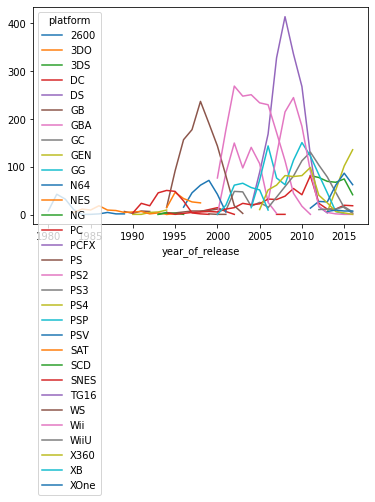

In [75]:
data.groupby(['platform', 'year_of_release'])['total_sales'].count().unstack('platform').plot()

Важны ли данные за все периоды? Судя по всему, данные за самые ранние периоды по 1995 год не стоит брать во внимание, так как индустрия только начинала развиваться и выпуск игр сильно выбивается из общей картины.

Посмотрим как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [76]:
platforms_ascending = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top10_platforms = platforms_ascending.reset_index()
iloc_top10_platforms = top10_platforms.iloc[0:10]
top10_platforms = iloc_top10_platforms['platform'].unique()
platforms_ascending

,total_sales
platform,
PS2,1120.11
Wii,769.65
PS,697.10
DS,690.60
X360,569.25
PS3,524.23
PS4,255.01
GBA,242.69
NES,234.59


<AxesSubplot:xlabel='platform'>

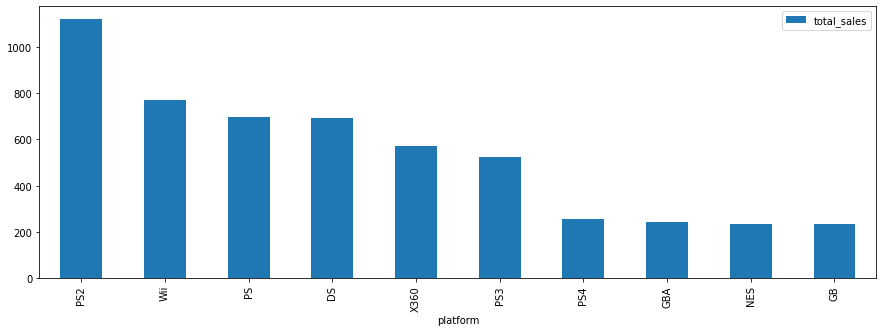

In [77]:
iloc_top10_platforms.plot(x="platform", y="total_sales", kind='bar', figsize=(15,5))#рассмотрим рейтинг наглядно

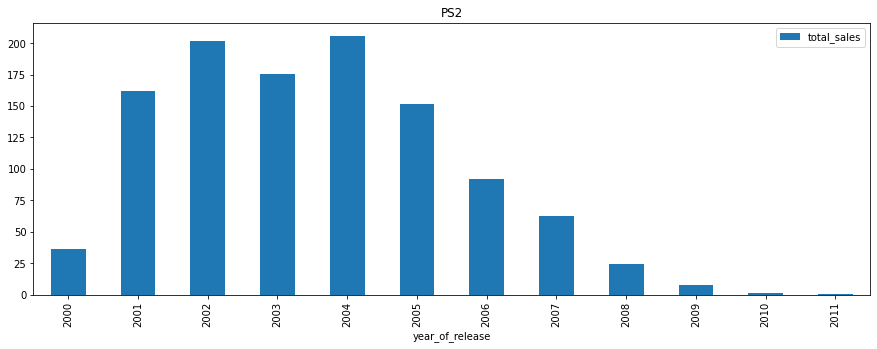

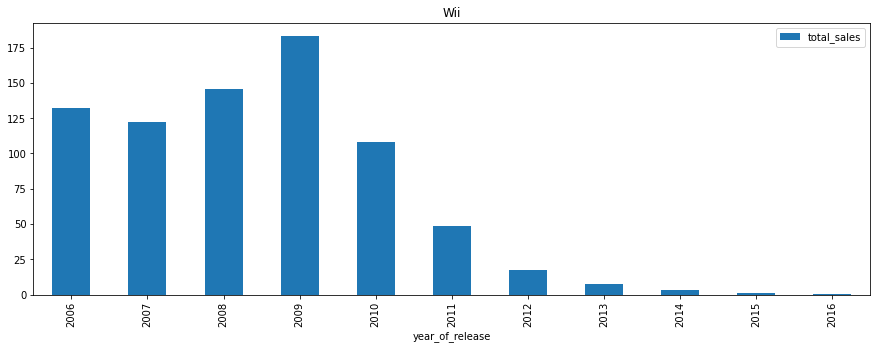

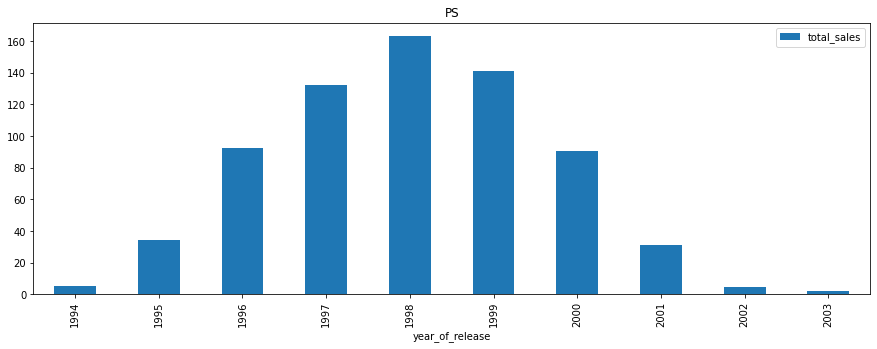

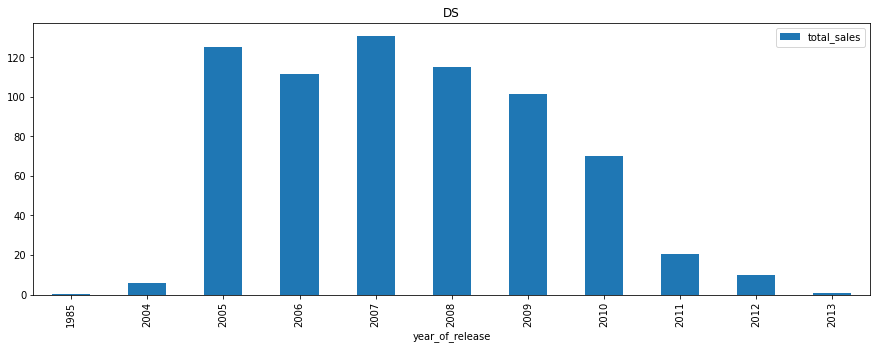

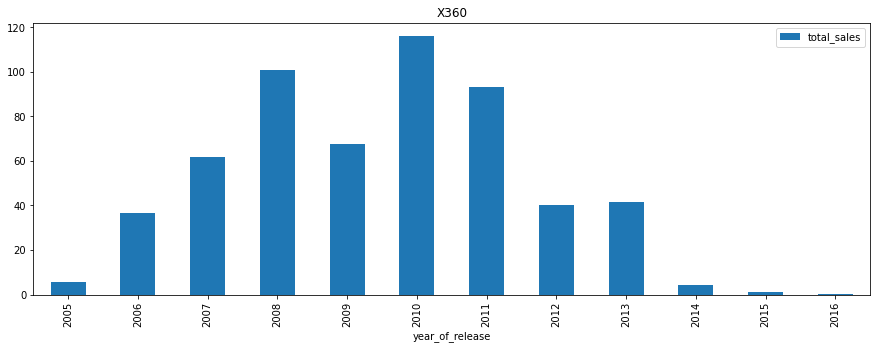

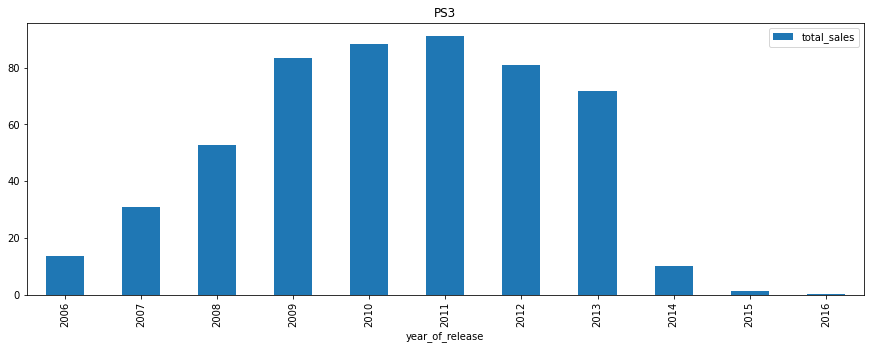

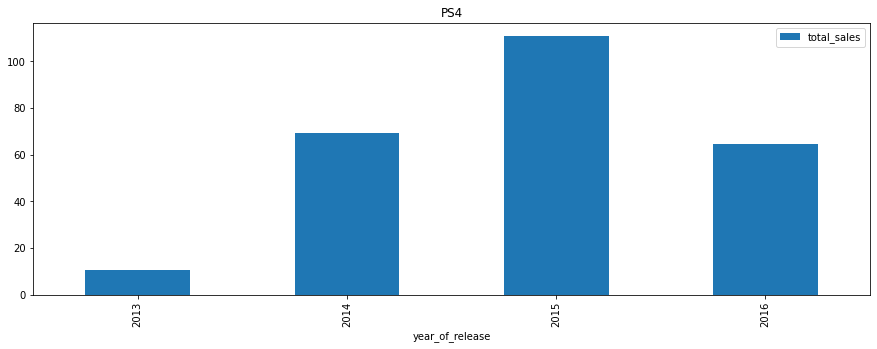

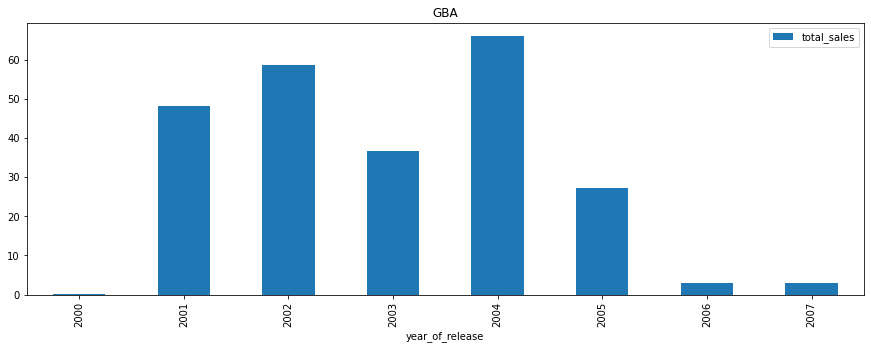

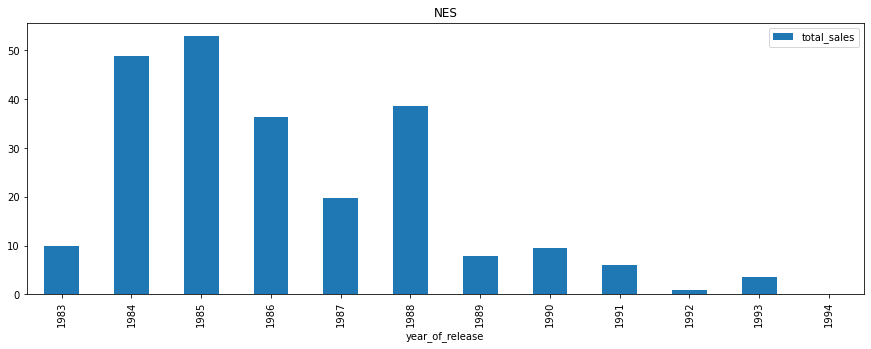

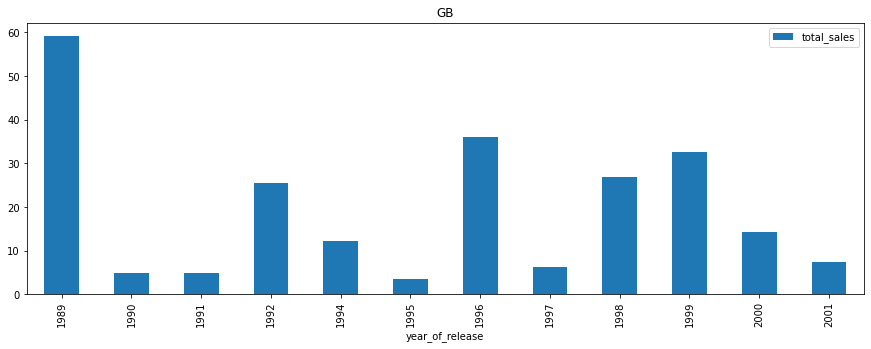

In [78]:
for platform in top10_platforms:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)

Игры популяры около 10 лет,до 2005 года игры продавались не так активно,за актуальный период возмем 2015-2016 гг.

https://habr.com/ru/company/ruvds/blog/494720/

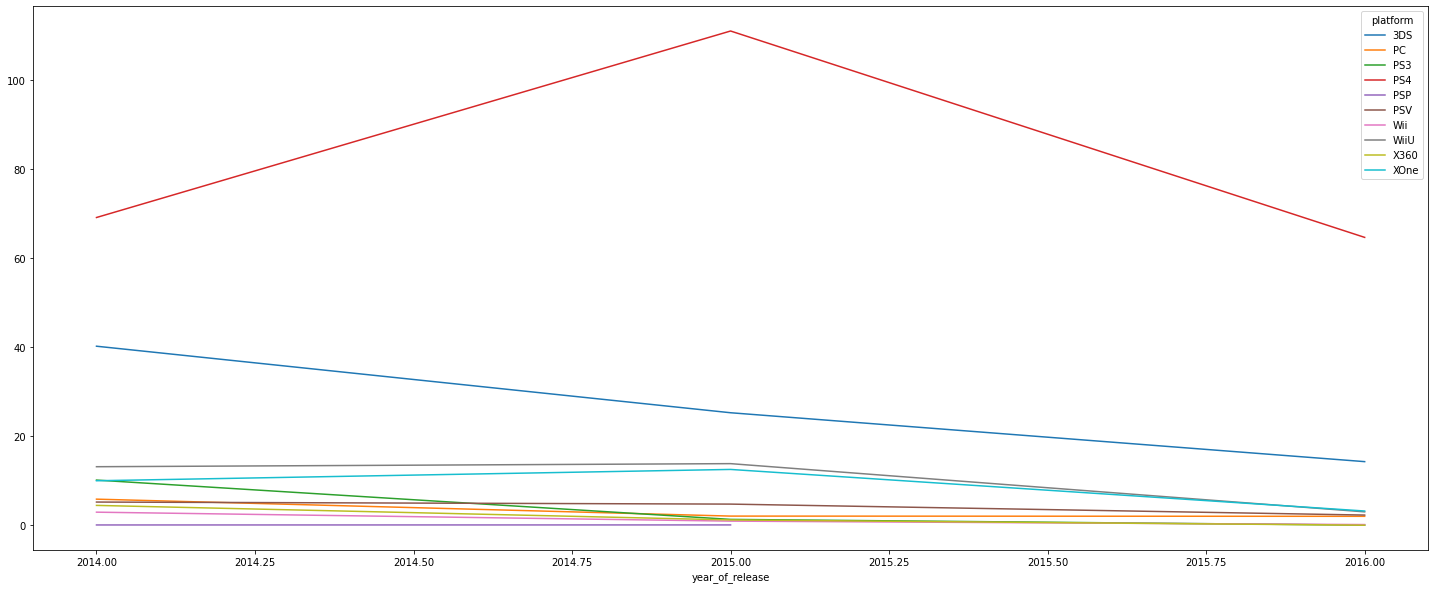

In [79]:
data_yars = data[data['year_of_release'] >= 2014]

data_yars.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(figsize = (25,10))
plt.show()

In [80]:
data_yars.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
30,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
68,FIFA 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
78,Star Wars Battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
83,Call of Duty: Advanced Warfare,PS4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
85,FIFA 17,PS4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
87,Super Smash Bros. for Wii U and 3DS,3DS,2014,fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
94,Fallout 4,PS4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
97,Pokemon Sun/Moon,3DS,2016,role-playing,2.98,1.45,2.26,0.45,NaN,NaN,unknown,7.14
99,Mario Kart 8,WiiU,2014,racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09


На графике видно как большинство платформ в течении 5 лет теряли свою актуальость, но есть и есть довольно таки интересные всплески роста, итог один стабильных платформ практически нет

In [131]:
# оставим только интересующие нас платформы
data_yars.query("platform == ['PS4','3DS','WiiU','XOne']")
data_yars.head(25)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
30,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
68,FIFA 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
78,Star Wars Battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
83,Call of Duty: Advanced Warfare,PS4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
85,FIFA 17,PS4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
87,Super Smash Bros. for Wii U and 3DS,3DS,2014,fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
94,Fallout 4,PS4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
97,Pokemon Sun/Moon,3DS,2016,role-playing,2.98,1.45,2.26,0.45,NaN,NaN,unknown,7.14
99,Mario Kart 8,WiiU,2014,racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09


шутеры самые популярные игры в заданном нами актуальном периоде

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

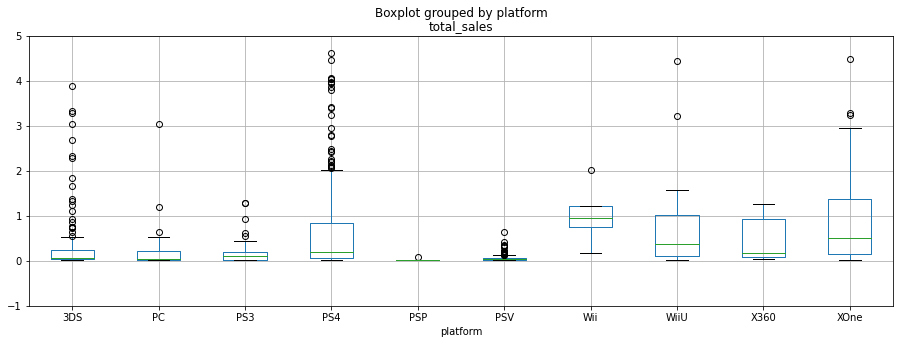

In [82]:
data_yars.boxplot(column='total_sales', by='platform', figsize=(15,5))
plt.ylim([-1,5])
plt.show()

очень много выбросов, что только подтвеждает график выше

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [83]:
# посчитайте корреляцию между отзывами и продажами, коэффициент корреляции Пирсона,в данном случае предполагает положительную корреляцию, близкую к 1
data_PS4 = data_yars[data_yars['platform']=='PS4']
data_PS4_cor = data_PS4['user_score'].corr(data_PS4['total_sales'])
display('Корреляция слабо отрицательная: {}'.format(data_PS4_cor))

'Корреляция слабо отрицательная: -0.06909431087901374'

Корреляция не прямая, оценки пользователь не особо влияют на популярность платформ, возможно аудитория очень разная, и поскольку это практически все мировое сообщество возможно они пишут на разных языках и не могут повлиять друг на друга

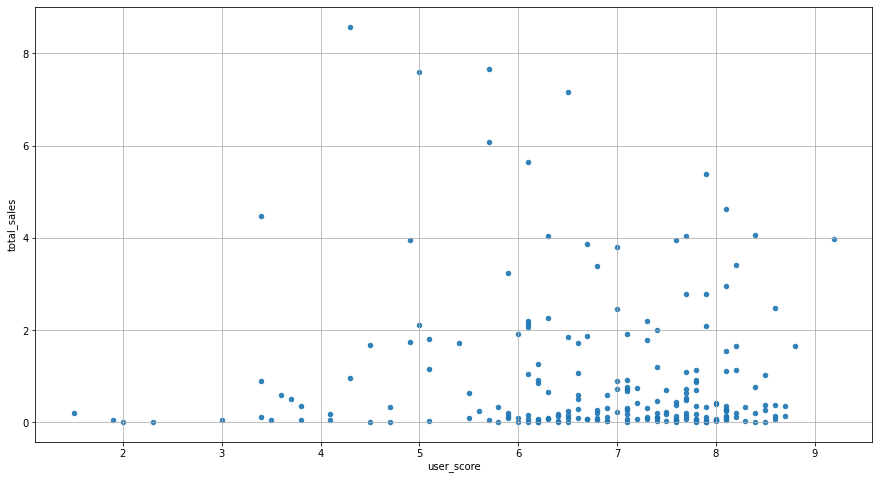

In [84]:
data_yars[data_yars['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,8), grid=True)
plt.show()

In [85]:
data_PS4 = data_yars[data_yars['platform']=='PS4']
data_PS4_cor = data_PS4['critic_score'].corr(data_PS4['total_sales'])
display('Корреляция слабо положительная: {}'.format(data_PS4_cor))

'Корреляция слабо положительная: 0.41964950521329797'

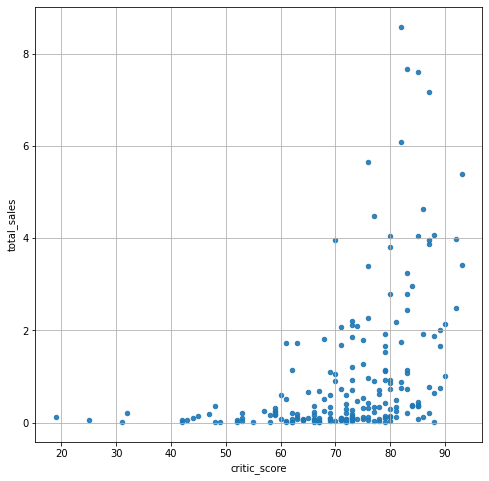

In [86]:
data_yars[data_yars['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(8,8), grid=True)
plt.show()

Корреляция продаж с отзывами критиков зачительо выше, возможно люди больше доверяют таким данным, или данные попадаются им чаще,корреляция слабая, но все же оа прямая, мнение критиков очевидно читаются пользователями 

Соотнесите выводы с продажами игр на других платформах.

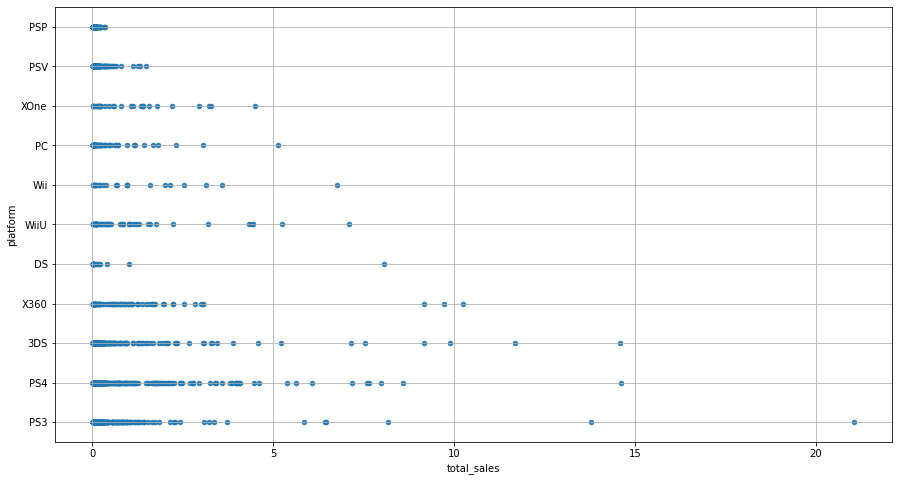

In [87]:
data_t = data.query("2012 <= year_of_release <= 2016")
data_t.plot(x='total_sales', y='platform', kind='scatter', alpha=0.9,figsize=(15,8),  grid=True)
plt.show()

Продажи падают на всех платформах, но с разными темпами и в разные периоды,есть откровенные аутсайдеры- возможно нет возможности своевременно обновлять игры.В представленной диаграмме мы видим, что есть очень редкие выбросы, возможо это связанно с популярностью игр и промо акциями 

In [88]:
#data.boxplot(column='total_sales', by='platform', figsize=(25,7))# рассмотрим общюю картину продаж по всем платформам
#plt.ylim(-1,5)
#plt.show()

избавимся от выбросов

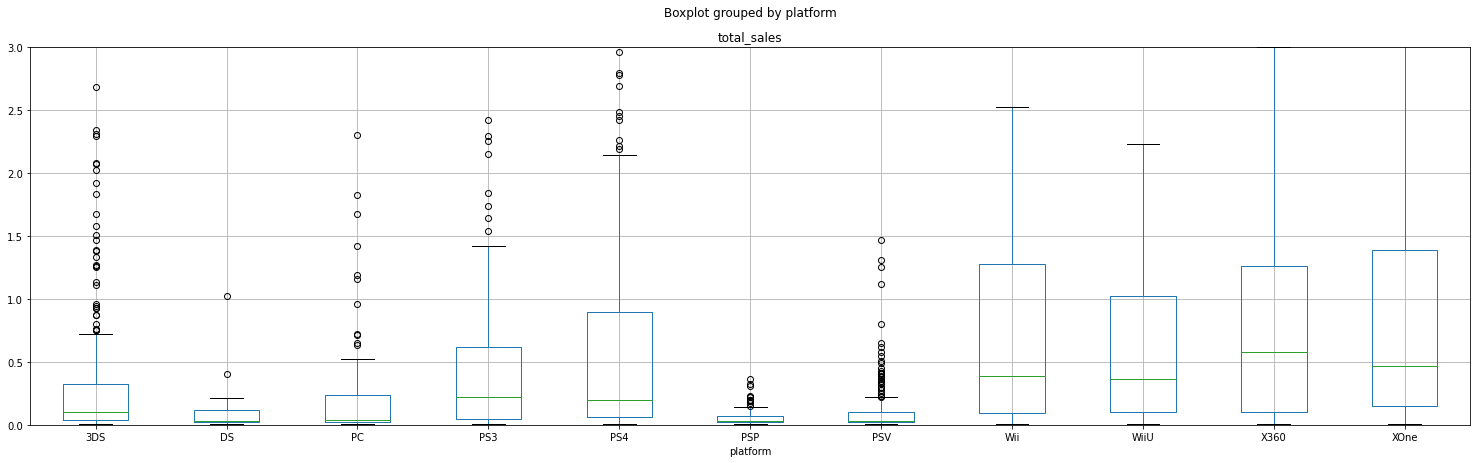

In [89]:
data_t.boxplot(column='total_sales', by='platform', figsize=(25,7))
# подгоняем данные по стороне 'Y'
plt.ylim(0, 3)
plt.show()

Лидеры остались теми же PS4 возможно разница в продаваемых жанрах игр


PS3:
Коэффициент корреляции user_score и total_sales: -0.01
Коэффициент корреляции critic_score и total_sales: 0.37

X360:
Коэффициент корреляции user_score и total_sales: -0.01
Коэффициент корреляции critic_score и total_sales: 0.37

Wii:
Коэффициент корреляции user_score и total_sales: -0.01
Коэффициент корреляции critic_score и total_sales: 0.37

PSP:
Коэффициент корреляции user_score и total_sales: -0.01
Коэффициент корреляции critic_score и total_sales: 0.37


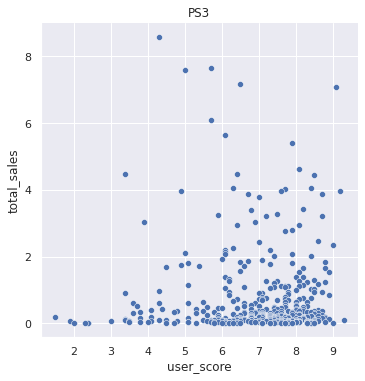

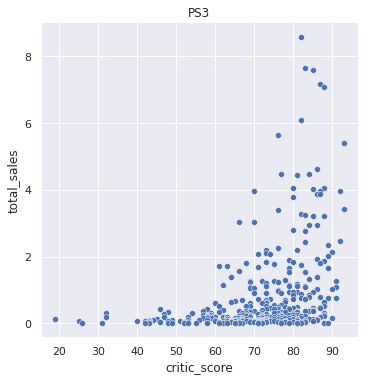

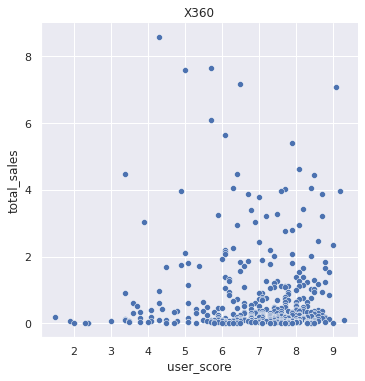

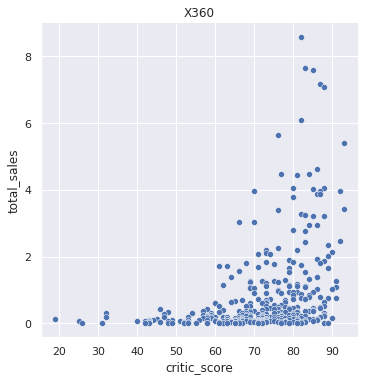

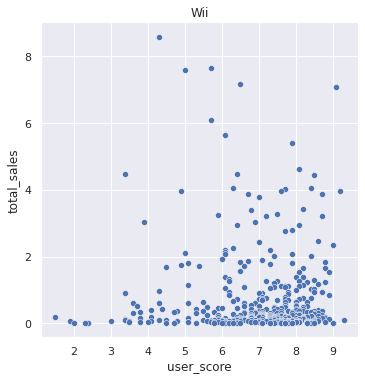

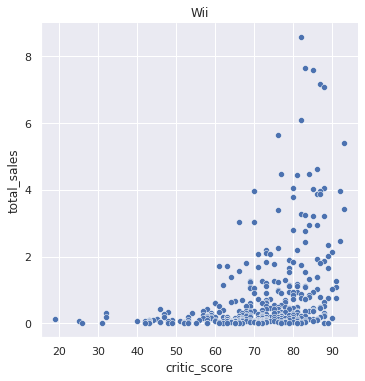

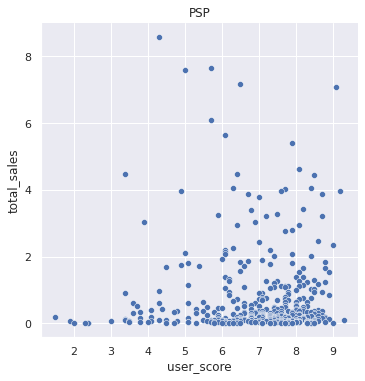

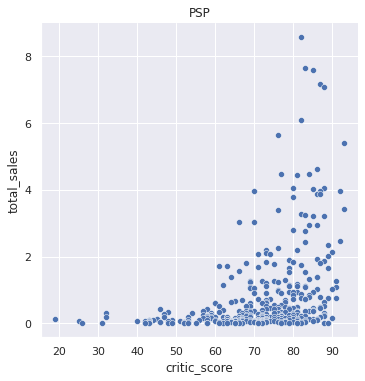

In [137]:
import seaborn as sns
sns.set(color_codes=True)
for platform in ['PS3', 'X360', 'Wii', 'PSP']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = data_yars.query('platform == platform and (user_score != -1) and (critic_score != -1)')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column].corr(temp['total_sales']), 2)))
        sns.relplot(x=column, y="total_sales", data=temp)
        _ = plt.title(platform)

Рассмотрев другие платформы можно заметить, что выводы напрашиваются все те же :
Корреляция отзывов пользователей слабо отрицательная;
Корреляция отзывов критиков так же как и по платформе PS4 слабо отрицательная, тенденция одинаковая, пользователи мало обращают внимания на мнение критиков и пользователей.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами


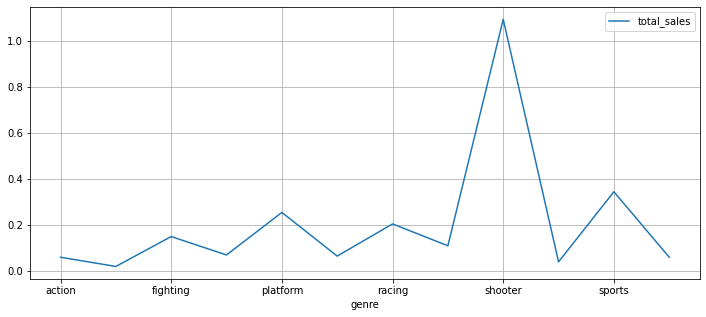

In [90]:
data_yars.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(grid=True, figsize=(12, 5))
plt.show()

Шутеры и спорт игры продаются больше всего, спорт отстает.Эти жанры возможо востребованы больше из-за того, что пользователи -более взрослая аудитория и может позволить себе больше покупок, а так же эти жанры более развиты и чаще выпускаются новинки.

Определите для пользователя каждого региона (NA, EU, JP):
•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.
•	Самые популярные жанры (топ-5). Поясните разницу.
•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


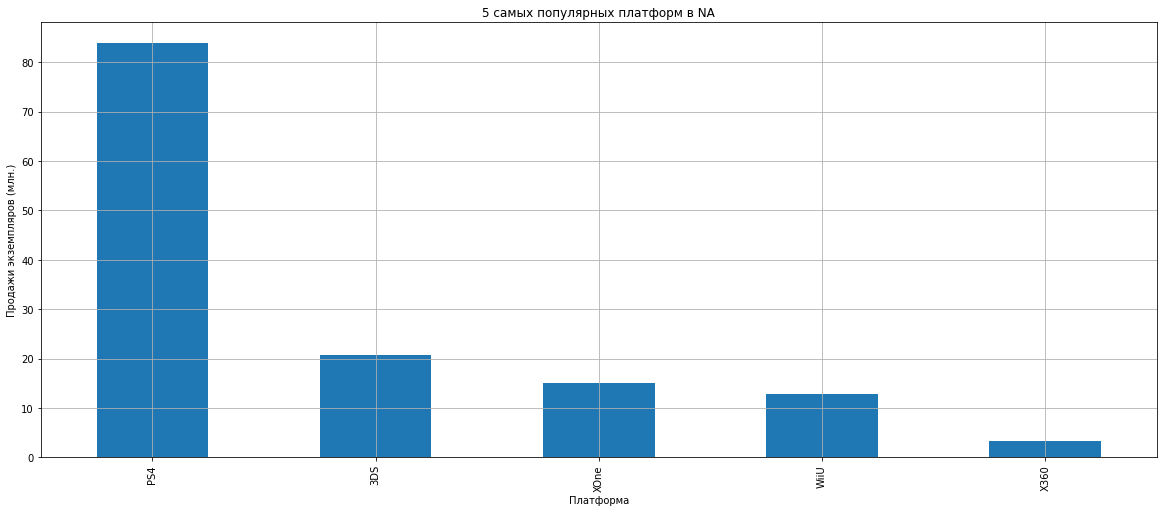

In [91]:
#5 самых популярных платформ NA по общей таблице группируем по платформе
platform_na_all = data_yars.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_na_all.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = '5 самых популярных платформ в NA')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

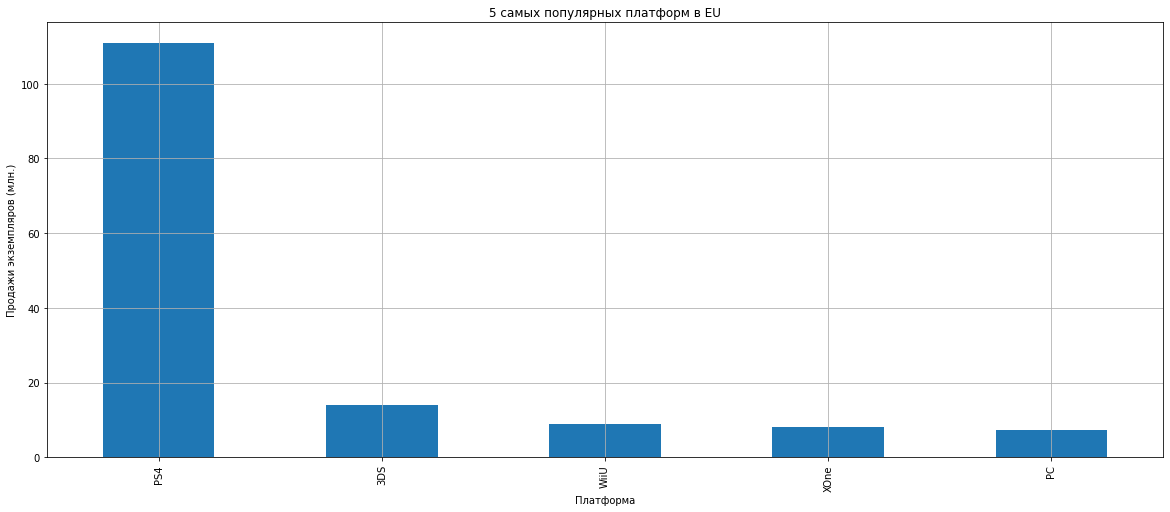

In [92]:
#5 самых популярных платформ EU по общей таблице группируем по платформе
platform_na_all = data_yars.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_na_all.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = '5 самых популярных платформ в EU')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

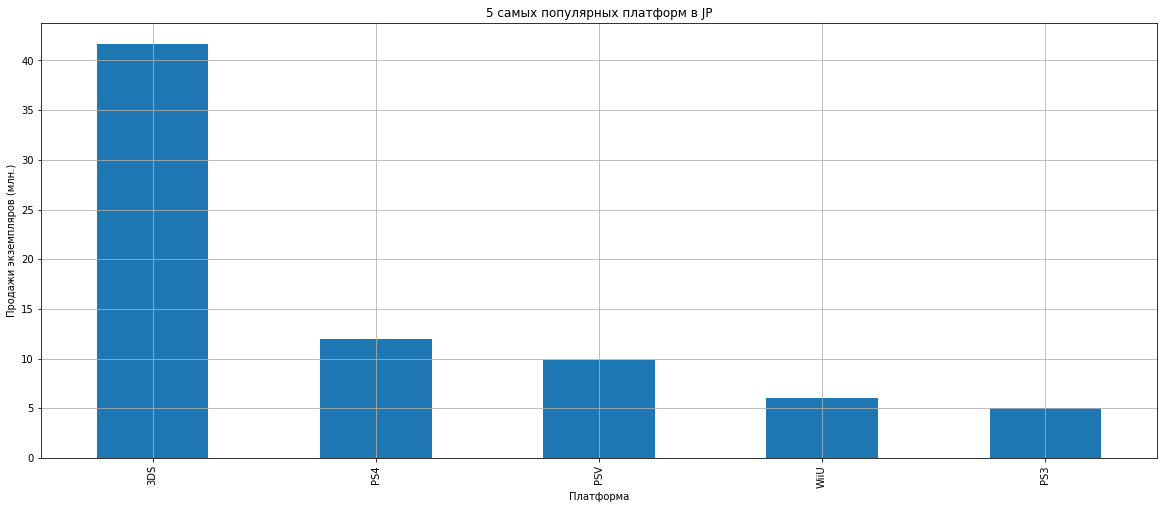

In [93]:
#5 самых популярных платформ NA по общей таблице группируем по платформе
platform_na_all = data_yars.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_na_all.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = '5 самых популярных платформ в JP')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Выявленная нами платформа PS4 как лидер, в выбранном нами актуальном периоде пользуется наибольшей популярностью как в северной америке, так и в европе,а вот в японии всего на 2-м месте, но учитывая населенность континентов она является самой популярной.Уточним в процентном соотношении продажи

Самые популярные жанры (топ-5). Поясните разницу

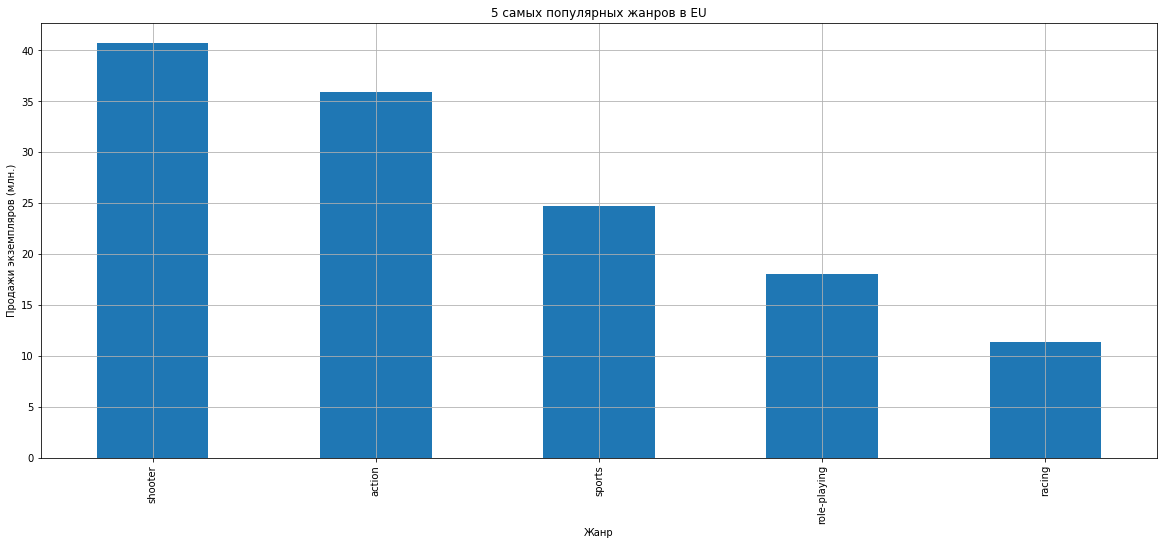

In [94]:
genre_eu = data_yars.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_eu.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = '5 самых популярных жанров в EU')
plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Европе шутеры всего на втором месте, лидирует жанр экшен, посмотрим как дела обстоят в Амереке и Японии 

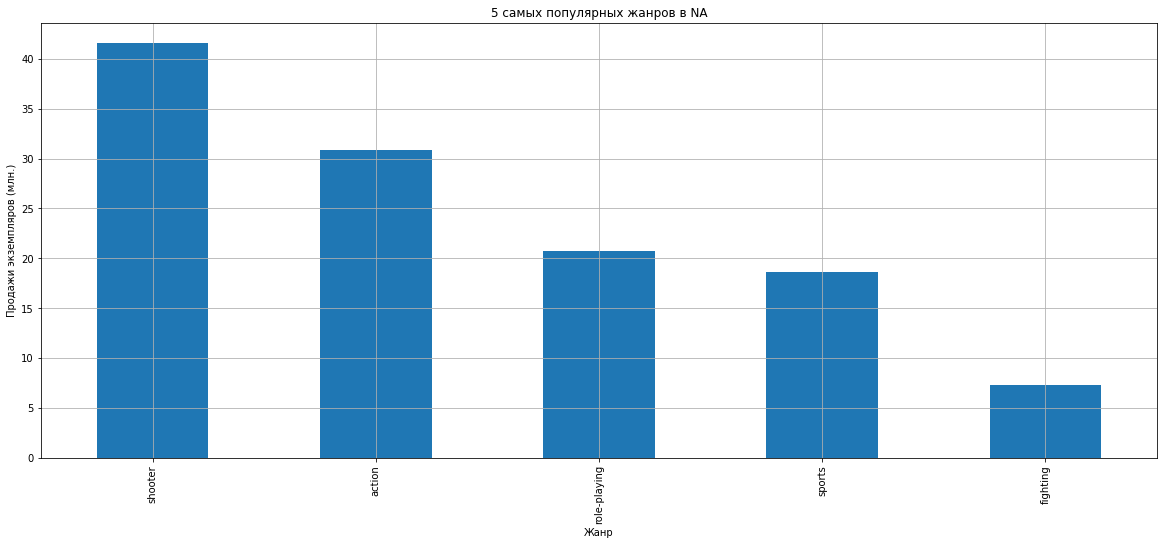

In [95]:
genre_eu = data_yars.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_eu.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = '5 самых популярных жанров в NA')
plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Картина в северной амереке повторилась 

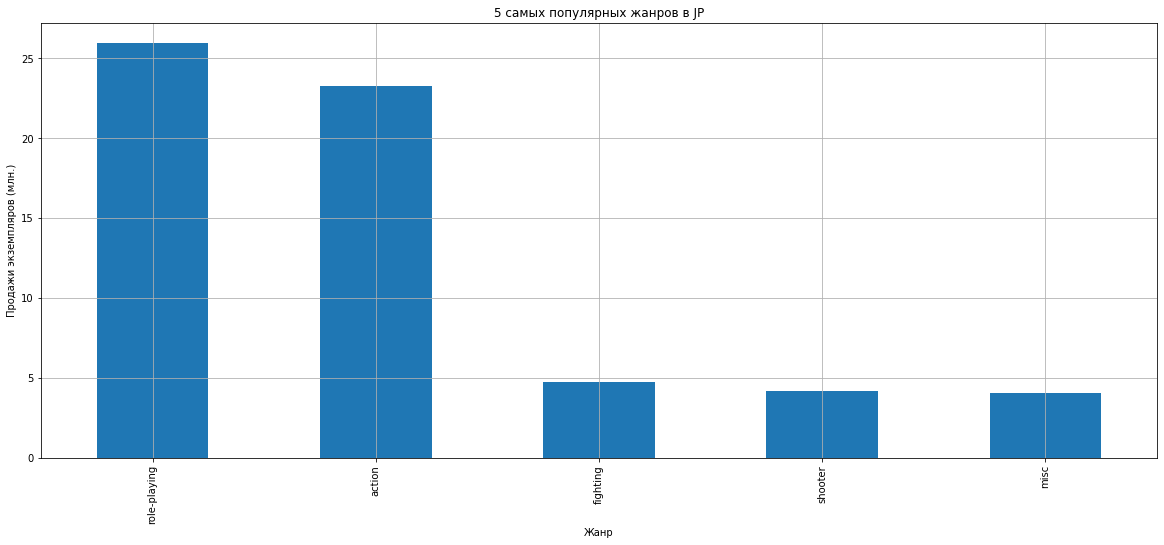

In [96]:
genre_eu = data_yars.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
genre_eu.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = '5 самых популярных жанров в JP')
plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

в японии более популярны ролевые игры, как видим шутеры более популярны из-за того, что 2 континента любят играть в эти игры, в совокупности именно поэтому этот жанр на первом месте 

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

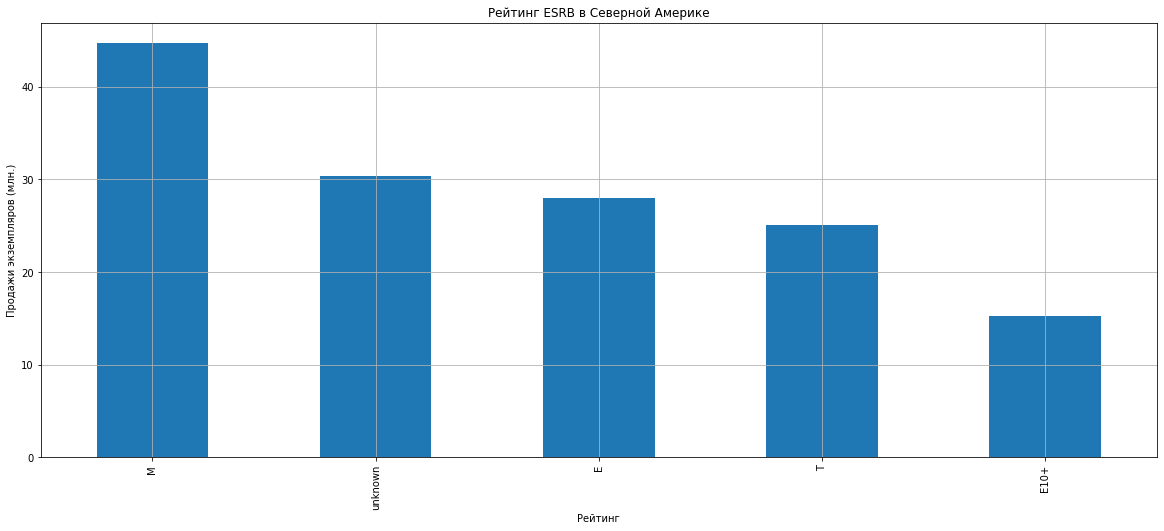

In [97]:
rating_na = data_yars.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Как видим, в Амереке по данным ESRB попялярны игры приключения и хорор. 

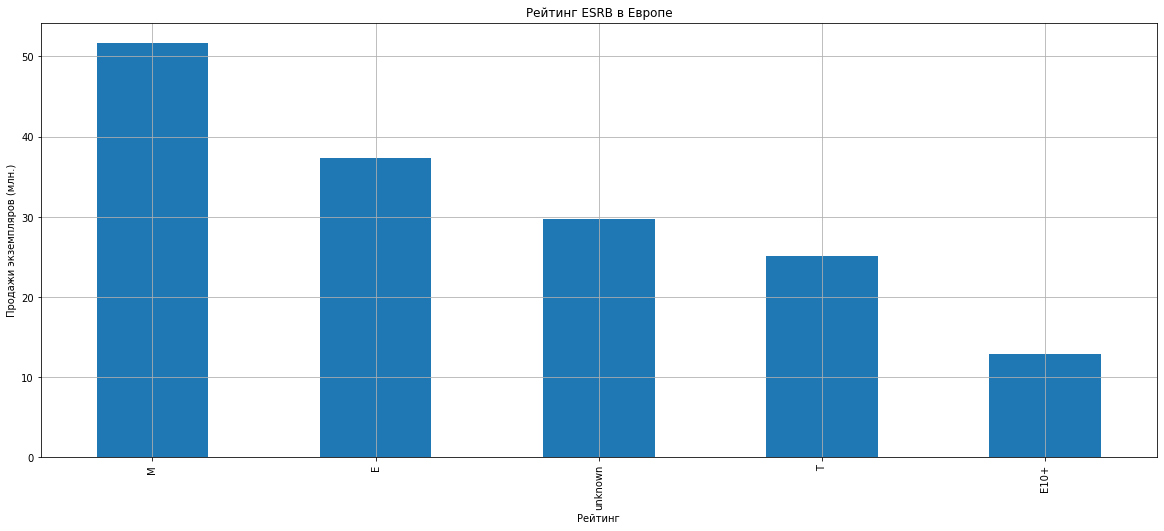

In [98]:
rating_eu = data_yars.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Картина В Европе согласно рейтингу ESRB популярны игры жанра M.Е- квесты. 

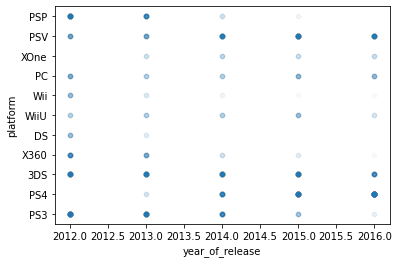

In [99]:
data_t.plot(x='year_of_release', y='platform', kind='scatter', alpha=0.03) 
plt.show()

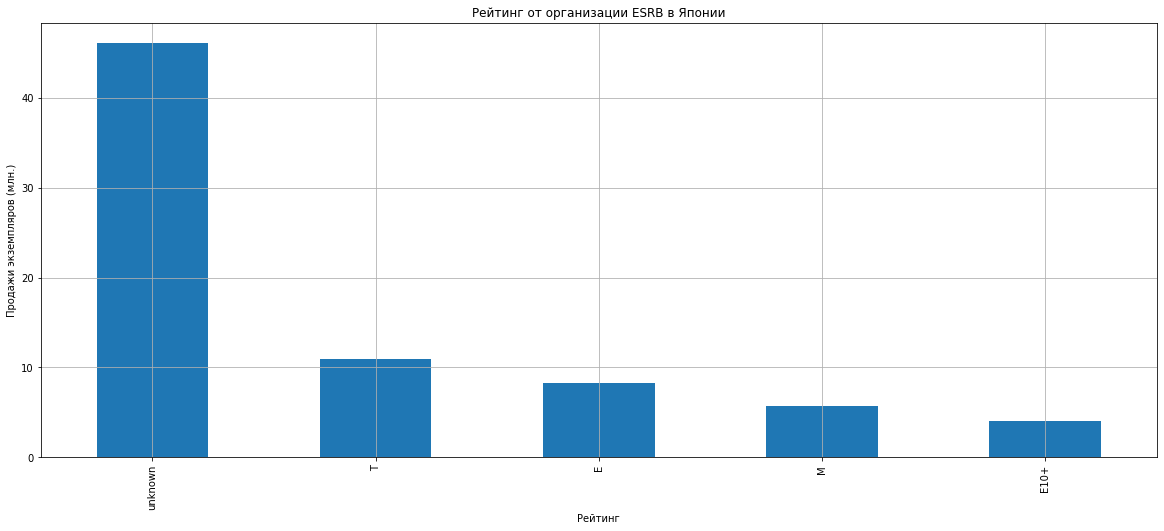

In [100]:
rating_jp = data_yars.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

интересные данные, в Японии по данным организации ESRB очень популярны игры жанра приключения и хорор, но все остальные жанры сильно отстают от популярного, такой сильной разницы в популярности нет ни в европе ни в амереке

Проверим гипотезы:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Рассмотрим гипотизу:
Н0- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Н1-Средние пользовательские рейтинги платформ Xbox One и PC разные;

In [116]:
data_yars.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
30,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
68,FIFA 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
78,Star Wars Battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
83,Call of Duty: Advanced Warfare,PS4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
85,FIFA 17,PS4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
87,Super Smash Bros. for Wii U and 3DS,3DS,2014,fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
94,Fallout 4,PS4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
97,Pokemon Sun/Moon,3DS,2016,role-playing,2.98,1.45,2.26,0.45,NaN,NaN,unknown,7.14
99,Mario Kart 8,WiiU,2014,racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09


In [112]:
m = data_yars.query('platform == "XOne" & user_score > 0')['user_score']# results = вызов метода для проверки гипотезы
pr = data_yars.query('platform == "PS4" & user_score>0')['user_score']

results = st.ttest_ind(m,pr)

alpha = 0.05#задайте значение уровня значимости
print('p-значение',results.pvalue)

# вывод значения p-value на экран 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    #results = вызов метода для проверки гипотезы

# alpha = задайте значение уровня значимости

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом






p-значение 0.3500838672658536
Не получилось отвергнуть нулевую гипотезу


Наша гипотеза подтвердилась, рейтинги одинаковые, данные платформы даже на графиках выше идут практически на равных, данным расчетом, мы лишь подвердили информацию.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha
Н0- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;
Н1-Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;

Не удалось опровергнуть гипотезу, рейтинги у данных игр разные, 

In [115]:
a = data_yars.query('genre == "action" & user_score > 0')['user_score']# results = вызов метода для проверки гипотезы
s = data_yars.query('genre == "sports" & user_score>0')['user_score']
results = st.ttest_ind(a,s)
   
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

5.1509652946339965e-06
Отвергаем нулевую гипотезу


гипотеза Н0- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные- отвергнута,
на графиках выше мы уже понимали что это так.

Проведя исследование, можо отметить ряд особенностей отрасли в целом,
при планировании стратегии компании на 2017 г., необходимо учитывать, что популярностью в большей части мира пользуются шутеры, но есть региональные особености в частности -Япония.
Компаия должна решить, какой жанр игр ей легче продвигать и на каком именно рынке. 

Судя по портрету пользователей по регионам есть ньюансы предпочтения игровых платформ, так же необходимо отследить именно рейтинги платформ на континентах.

При всех возможностях предоставляемых организацией ESRB необходимо проверять рейтинги платформ хотя бы раз в квартал, так как случаются довольно таки резкие скачки как роста, так и падения продаж.

Заметно, что рано или поздно все платформы "скатываются", возможо при принятии решений стоит рассмотреть особенности быстро падающих платформ и быстро растущих, для поимания причин таких скачков, это поможет ориентироваться на рынке быстрее.


На данный момент самая популярная платформа PS4, в Европе и Амереке популярны шутеры, Япония предпочитает ролевые игры(менее агрессивные), планируя рекламные акции нужно учесть, что рейтинги критиков и тем более пользователей не сильно влияют на продажи, очевидно людей привлекают ярко прорекламированные новинки, или долго существующие игры с регулярными обновлениями.
